In [1]:
import pandas as pd
import numpy as np

import scipy as sp
import sklearn as sk

from scipy.stats.mstats import winsorize

from datetime import datetime

#plotting
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
url_march = "yellow_tripdata_2017-03.csv"
url_june = "yellow_tripdata_2017-06.csv"
url_nov = "yellow_tripdata_2017-11.csv"

taxi_march = pd.read_csv(url_march)
taxi_june = pd.read_csv(url_june)
taxi_nov = pd.read_csv(url_nov)  

In [3]:
print(len(taxi_march))
print(len(taxi_june))
print(len(taxi_nov))

10294628
9656993
9284803


In [4]:
M_J = taxi_march.append(taxi_june) # hold out nov data as out-sample test set for use after model is built

In [5]:
M_J.shape[0]

19951621

In [6]:
M_J.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


In [7]:
M_J.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [8]:
M_J.describe(percentiles = [0.01, .05, .16, 0.5, 0.84, 0.95, 0.99])

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07,1.995162e+07
mean,1.544536e+00,1.620993e+00,2.930149e+00,1.043840e+00,1.627654e+02,1.607346e+02,1.331307e+00,1.309461e+01,3.410880e-01,4.972955e-01,1.867476e+00,3.236290e-01,2.996261e-01,1.642825e+01
std,4.980126e-01,1.263586e+00,4.784653e+00,5.453794e-01,6.680740e+01,7.063024e+01,4.913213e-01,1.548194e+02,4.649833e-01,7.403506e-02,2.657807e+00,1.961829e+00,1.413193e-02,1.550502e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.371000e+01,-5.000000e-01,-9.100000e+01,-1.750000e+01,-3.000000e-01,-5.503000e+02
1%,1.000000e+00,1.000000e+00,1.600000e-01,1.000000e+00,1.300000e+01,7.000000e+00,1.000000e+00,3.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,4.300000e+00
5%,1.000000e+00,1.000000e+00,4.900000e-01,1.000000e+00,4.800000e+01,4.200000e+01,1.000000e+00,4.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,5.800000e+00
16%,1.000000e+00,1.000000e+00,7.800000e-01,1.000000e+00,8.700000e+01,7.900000e+01,1.000000e+00,5.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.500000e+00
50%,2.000000e+00,1.000000e+00,1.610000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
84%,2.000000e+00,2.000000e+00,4.500000e+00,1.000000e+00,2.370000e+02,2.370000e+02,2.000000e+00,1.900000e+01,1.000000e+00,5.000000e-01,3.160000e+00,0.000000e+00,3.000000e-01,2.315000e+01
95%,2.000000e+00,5.000000e+00,1.080000e+01,1.000000e+00,2.610000e+02,2.610000e+02,2.000000e+00,3.700000e+01,1.000000e+00,5.000000e-01,6.530000e+00,5.540000e+00,3.000000e-01,4.730000e+01


From describe, we can infer the following:

Based on counts, there is no missing data

1. VendorID: only takes on values 1 and 2
passenger_count: there are instances with 0 passenger, which we need to remove. The maximum number of passengers is 9, which is very likely an error, since the maximum that can fit into a van is 6. So we need to remove that too.
2. trip_distance: the minimum trip distane is 0, we need to remove those data. The maximum data is out of the 99 percentile. We can clip that outlier after error data removal.
3. RatecodeID: 99 is not a proper code, need to remove those
4. payment_type: since codes 2-6 doesn't offer any information on tips, we can remove those and only keep the CC payments
5. fare_amount: The minimum here is negative, we need to remove negative values and zero fare amounts
6. extra: The minimum for this cannot be less than 0
7. mta_tax: Again, the minimum here cannot be less than 0
8. tip_amount: cannot be negative
9. tolls_amount: cannot be negative
10. improvement: cannot be negative
11. total_amount: cannot be negative

In [9]:
M_J_clean = M_J[(M_J['passenger_count']>0) & 
                (M_J['passenger_count']<7) & 
                (M_J['trip_distance']>0) & 
                (M_J['RatecodeID']<7) &
                (M_J['payment_type'] == 1) &
                (M_J['fare_amount'] > 0) & 
                (M_J['extra'] >= 0) & 
                (M_J['mta_tax'] >= 0) & 
                (M_J['tip_amount'] > 0) & 
                (M_J['tolls_amount'] >= 0) & 
                (M_J['improvement_surcharge'] >= 0) & 
                (M_J['total_amount'] > 0)]

In [10]:
M_J_clean.shape[0]/M_J.shape[0] # about ~1/3 of the data is removed from cleaning

0.6468451360418284

I would like to add another feature: time difference between pickup and drop off

In [11]:
M_J_clean.tpep_pickup_datetime.head() # the data has datetime as an object

0    2017-03-09 21:30:11
2    2017-03-09 22:01:08
3    2017-03-09 22:16:05
5    2017-03-01 00:00:00
6    2017-03-01 00:00:00
Name: tpep_pickup_datetime, dtype: object

In [12]:
M_J_clean.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(M_J_clean.loc[:, 'tpep_pickup_datetime'], yearfirst=True)
M_J_clean.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(M_J_clean.loc[:, 'tpep_dropoff_datetime'], yearfirst=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
M_J_clean['time_diff_sec'] = M_J_clean['tpep_dropoff_datetime']-M_J_clean['tpep_pickup_datetime']
M_J_clean['time_diff_sec'] = M_J_clean['time_diff_sec']/np.timedelta64(1,'s')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
M_J_clean.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,time_diff_sec
count,1.290561e+07,1.290561e+07,1.290561e+07,1.290561e+07,1.290561e+07,1.290561e+07,12905609.0,1.290561e+07,1.290561e+07,1.290561e+07,1.290561e+07,1.290561e+07,1.290561e+07,1.290561e+07,1.290561e+07
mean,1.540649e+00,1.604944e+00,3.071110e+00,1.034528e+00,1.634269e+02,1.613719e+02,1.0,1.338896e+01,3.475662e-01,4.983666e-01,2.858588e+00,3.625304e-01,2.999864e-01,1.776268e+01,9.923950e+02
std,4.983449e-01,1.255455e+00,3.781098e+00,2.416153e-01,6.615739e+01,7.022965e+01,0.0,1.121593e+01,4.581835e-01,2.885291e-02,2.712950e+00,1.551222e+00,2.016306e-03,1.464735e+01,2.771592e+03
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,2.200000e+00,-2.568170e+05
25%,1.000000e+00,1.000000e+00,1.020000e+00,1.000000e+00,1.140000e+02,1.120000e+02,1.0,7.000000e+00,0.000000e+00,5.000000e-01,1.450000e+00,0.000000e+00,3.000000e-01,9.360000e+00,4.270000e+02
50%,2.000000e+00,1.000000e+00,1.720000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.0,1.000000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.296000e+01,7.040000e+02
75%,2.000000e+00,2.000000e+00,3.200000e+00,1.000000e+00,2.330000e+02,2.330000e+02,1.0,1.500000e+01,5.000000e-01,5.000000e-01,3.150000e+00,0.000000e+00,3.000000e-01,1.955000e+01,1.145000e+03
max,2.000000e+00,6.000000e+00,5.985000e+02,6.000000e+00,2.650000e+02,2.650000e+02,1.0,4.250000e+02,1.000000e+01,7.680000e+00,4.440000e+02,2.124700e+02,3.000000e-01,5.199900e+02,8.644590e+05


Obviously, we need to get rid of negative time and zero time

In [15]:
M_J_clean = M_J_clean[M_J_clean['time_diff_sec'] > 0].copy(deep=True)

In [16]:
# We can also look at speed and tip_percentage

M_J_clean['tip_percentage'] = M_J_clean['tip_amount']/M_J_clean['fare_amount']
M_J_clean['speed'] = M_J_clean['trip_distance']/M_J_clean['time_diff_sec']

## clip outliers

In [17]:
M_J_clean.describe(percentiles=[0.01, 0.05, 0.16, 0.5, 0.84, 0.95, 0.99 ])

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,time_diff_sec,tip_percentage,speed
count,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07,12905273.0,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07,1.290527e+07
mean,1.540638e+00,1.604938e+00,3.070942e+00,1.034515e+00,1.634270e+02,1.613721e+02,1.0,1.338834e+01,3.475621e-01,4.983672e-01,2.858456e+00,3.624828e-01,2.999867e-01,1.776188e+01,9.924408e+02,2.297297e-01,3.367585e-03
std,4.983459e-01,1.255449e+00,3.780825e+00,2.415525e-01,6.615755e+01,7.022944e+01,0.0,1.121457e+01,4.581667e-01,2.884828e-02,2.712680e+00,1.551131e+00,1.993726e-03,1.464570e+01,2.770695e+03,6.798932e+00,2.612051e-02
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,2.200000e+00,1.000000e+00,3.703704e-05,1.175737e-07
1%,1.000000e+00,1.000000e+00,3.200000e-01,1.000000e+00,1.300000e+01,7.000000e+00,1.0,3.500000e+00,0.000000e+00,5.000000e-01,6.800000e-01,0.000000e+00,3.000000e-01,5.750000e+00,1.170000e+02,5.882353e-02,8.007117e-04
5%,1.000000e+00,1.000000e+00,5.300000e-01,1.000000e+00,4.800000e+01,4.300000e+01,1.0,4.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,6.800000e+00,2.030000e+02,1.000000e-01,1.242545e-03
16%,1.000000e+00,1.000000e+00,8.100000e-01,1.000000e+00,9.000000e+01,7.900000e+01,1.0,6.000000e+00,0.000000e+00,5.000000e-01,1.160000e+00,0.000000e+00,3.000000e-01,8.300000e+00,3.340000e+02,1.578947e-01,1.761658e-03
50%,2.000000e+00,1.000000e+00,1.720000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.0,1.000000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.296000e+01,7.040000e+02,2.214286e-01,2.786378e-03
84%,2.000000e+00,2.000000e+00,4.790000e+00,1.000000e+00,2.370000e+02,2.370000e+02,1.0,2.000000e+01,1.000000e+00,5.000000e-01,4.080000e+00,0.000000e+00,3.000000e-01,2.496000e+01,1.445000e+03,2.720000e-01,4.425887e-03
95%,2.000000e+00,5.000000e+00,1.100000e+01,1.000000e+00,2.610000e+02,2.610000e+02,1.0,3.750000e+01,1.000000e+00,5.000000e-01,8.190000e+00,5.540000e+00,3.000000e-01,5.016000e+01,2.344000e+03,3.304348e-01,6.396697e-03


From describe, we can see that some of the features have heavy tails. 
1. trip distance: the 99 percentile is about 4 std away from the mean. Heavy Tail -> need to clip outliers
2. ratecodeID: most of the trip are coded as one. There is a heavy tail where the code is 6
3. fare_amount: Heavy Tail -> need to clip outliers
4. extra: Heavy Tail -> need to clip outliers
5. mta_tax: mostly around 50 cents, can clip other outlier as well
6. tip_amount: very heavy tail
7. tolls_amount: also heavy tail
8. improvment_surcharages: skewed left (left tail)
9. total_amount: heavy tail (skewed right)
10. time_diff_sec: heavy tail (skewed right)

In [18]:
# winsorize the data that exhibit a heavy tail

col = M_J_clean.columns.drop(['VendorID','RatecodeID','store_and_fwd_flag','payment_type', \
                          'tpep_pickup_datetime','tpep_dropoff_datetime', 'PULocationID', 'DOLocationID'])

for x in col:
    M_J_clean[x + '_win'] = winsorize(M_J_clean[x], [0.01,0.025])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ee81358>,
      dtype=object)

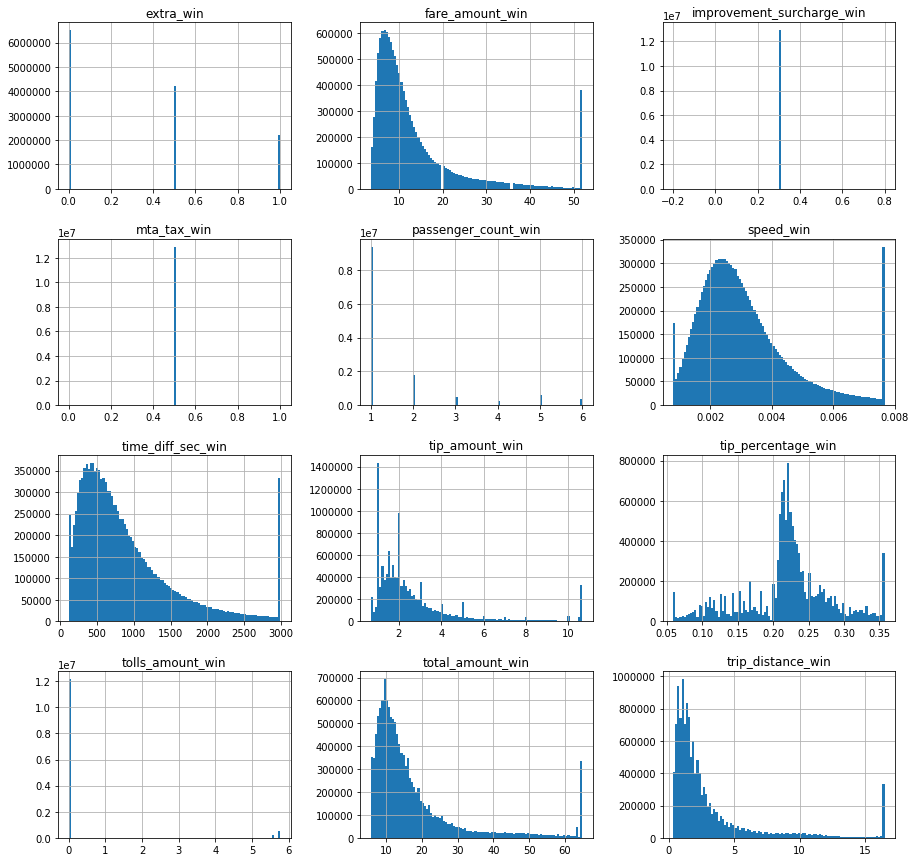

In [19]:
M_J_clean[col+'_win'].hist(bins=100, figsize=[15,15])

There is still some heavy tail, but it looks much better than before. (If it is crucial for the features to be normal distributed, we can also take log of the data, but because I want to keep it simple for now, I will stick to these winsorized features).  Let's look for some trends through a multivariate analysis of the features.

## Multivariate Analysis

In [20]:
M_J_clean[['tip_amount_win','tip_percentage_win','fare_amount_win','time_diff_sec_win',
           'trip_distance_win', 'speed_win', 'passenger_count' ]].corr()

,tip_amount_win,tip_percentage_win,fare_amount_win,time_diff_sec_win,trip_distance_win,speed_win,passenger_count
tip_amount_win,1.000000,0.216999,0.894397,0.801553,0.865869,0.447379,0.012869
tip_percentage_win,0.216999,1.000000,-0.148783,-0.187529,-0.118932,-0.020391,0.009554
fare_amount_win,0.894397,-0.148783,1.000000,0.896034,0.961192,0.485877,0.009683
time_diff_sec_win,0.801553,-0.187529,0.896034,1.000000,0.799835,0.178878,0.010394
trip_distance_win,0.865869,-0.118932,0.961192,0.799835,1.000000,0.638354,0.011773
speed_win,0.447379,-0.020391,0.485877,0.178878,0.638354,1.000000,0.011278
passenger_count,0.012869,0.009554,0.009683,0.010394,0.011773,0.011278,1.000000


Some take-aways from the pearson correlation:
1. There is a strong correlation between the tip_amount and the fare_amount (which make sense)
2. The longer the time spent, the longer the distance traveled (except during traffic), the bigger the fare. So the time difference and the trip distance have a strong correlation with the tip amount also make sense. 
3. However, when we look at the tip percentage, these correlations are negative. 
    a. The higher the fare amount, the less percentage tip was given
    b. The longer it took (both time and distance), it less the time (could be due to traffic)
4. passenger count doesn't seem to have much correlation with the tip amount or the tip percentage

Let's look for some trends:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114b052b0>,
      dtype=object)

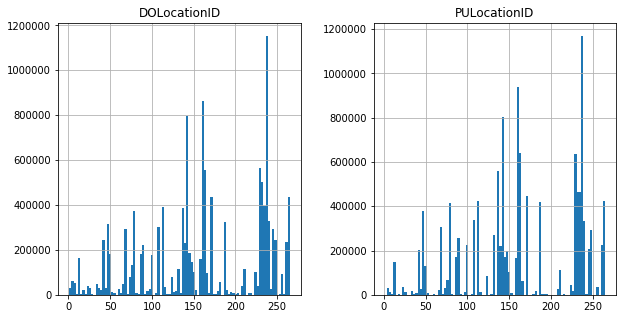

In [21]:
col_location = M_J_clean.iloc[:,7:9].columns
M_J_clean[col_location].hist(bins=100, figsize=[10,5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116fe37f0>,
      dtype=object)

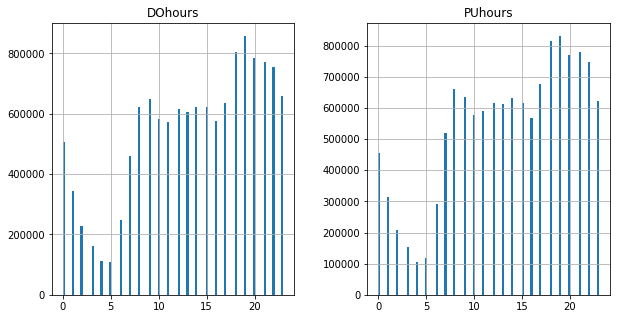

In [22]:
# We can also look at the hours of the day and see if there is a trend
M_J_clean['PUhours'] = M_J_clean['tpep_pickup_datetime'].dt.hour
M_J_clean['DOhours'] = M_J_clean['tpep_dropoff_datetime'].dt.hour

col_hour = M_J_clean.iloc[:,-2:].columns
M_J_clean[col_hour].hist(bins=100, figsize=[10,5])

There seems to be a strong correlation between pickup hour and drop off hour, which makes sense since most taxi trips can be completed within the hour. 

There is a strong decrease in rides after 11 pm. The peak in rides are around the morning and evening rush hours.

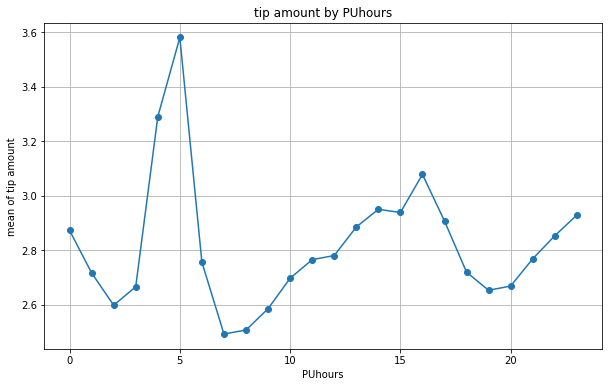

In [23]:
M_J_clean.groupby('PUhours')['tip_amount_win'].mean() \
    .plot(figsize=(10,6), title='tip amount by PUhours', marker='o')
plt.ylabel('mean of tip amount')
plt.grid()

The tips seemed to be higher when there are less yellowcabs on the road since the peaks in the tip amount aligned with the dips in the frequency of yellowcab rides during that hour.

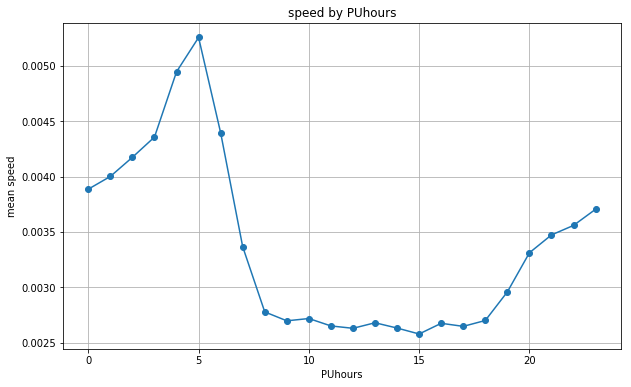

In [24]:
M_J_clean.groupby('PUhours')['speed_win'].mean() \
    .plot(figsize=(10,6), title='speed by PUhours', marker='o')
plt.ylabel('mean speed')
plt.grid()

Drivers are also able to cover more distance in less time from 8 pm - 6 am. At 5 am, drivers are driving the fastest and earning the most tips.

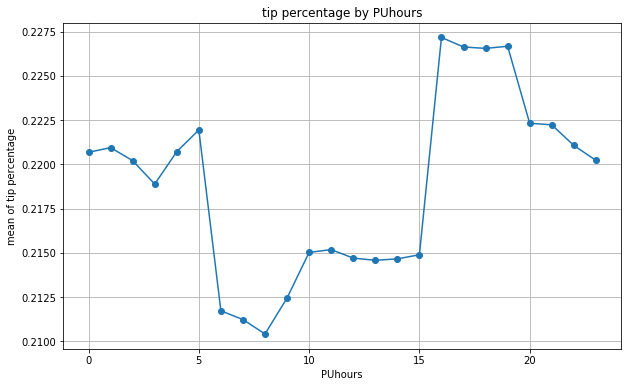

In [25]:
M_J_clean.groupby('PUhours')['tip_percentage_win'].mean() \
    .plot(figsize=(10,6), title='tip percentage by PUhours', marker='o')
plt.ylabel('mean of tip percentage')
plt.grid()

However, in terms of the percentage tips, it is actually the highest during the evening rush hour (4 pm - 7 pm). Tip percentage vs. PUhours is similar in March and June. Thus, there is no reason to believe that this percentage will change dramatically in Nov.

The tip amount seemed to be strongly correlated with fare amount, trip distance, and time spent. This makes sense since the higher the fare, the longer the distance & time traveled. 

# Model

According to the feature analysis above, it seems that we can start with a simple linear model with just one feature, namely, the fare amount. 

In [26]:
import statsmodels.api as sm

# might want to compare it with a simple tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor

from sklearn.decomposition import PCA

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
res_fare = sm.OLS(M_J_clean['tip_amount_win'], sm.add_constant(M_J_clean[['fare_amount_win']])).fit()
res_fare.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tip_amount_win   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 5.160e+07
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        19:49:45   Log-Likelihood:            -1.8050e+07
No. Observations:            12905273   AIC:                         3.610e+07
Df Residuals:                12905271   BIC:                         3.610e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2896      0.000    656.421      0.000       0.289       0.291
fare_amount_win     0.1879   2.62e-05   7183.579      0.000       0.188       0.188
==============================================================================
Omnibus:                  3208133.034   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         91123778.501
Skew:                          -0.586   Prob(JB):                         0.00
Kurtosis:                      15.965   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It seems like the fare amount can already capture a majority of the tip amount prediction. We can treat this $R^2 =0.8$ as a baseline as see if we can improve it further by considering other features that had shown a strong correlation to tip amount. My hypothesis is that they won't make a much difference because these features themselves are strongly correlated (i.e. longer distance usually means more time and higher fare).

In [28]:
res_3feat = sm.OLS(M_J_clean['tip_amount_win'], sm.add_constant(M_J_clean[['fare_amount_win', 
                                                                     'trip_distance_win', 
                                                                     'time_diff_sec_win']])).fit()
res_3feat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tip_amount_win   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                 1.727e+07
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        19:49:51   Log-Likelihood:            -1.8028e+07
No. Observations:            12905273   AIC:                         3.606e+07
Df Residuals:                12905269   BIC:                         3.606e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3560      0.001    634.144      0.000       0.355       0.357
fare_amount_win       0.1593      0.000   1076.994      0.000       0.159       0.160
trip_distance_win     0.0695      0.000    209.856      0.000       0.069       0.070
time_diff_sec_win     0.0001   1.09e-06    107.468      0.000       0.000       0.000
==============================================================================
Omnibus:                  3230006.376   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         90070099.656
Skew:                          -0.602   Prob(JB):                         0.00
Kurtosis:                      15.886   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By simply adding in more features, it doesn't improve the $R^2$ by much, as expected. What we can do next is to see if we can explain the parts not captured by the fare amount using other features. Let's call this residual 'err' defined as $\epsilon =$ tips - $\alpha$ - $\beta$*fare, where $\alpha$ and $\beta$ are from the linear regression (tips = $\alpha$ + $\beta$*fare + $\epsilon$) given above.

In [29]:
M_J_clean['err'] = M_J_clean['tip_amount_win'] - np.dot(sm.add_constant(M_J_clean[['fare_amount_win']]), 
                                                        res_fare.params)

In [30]:
# try using a simple tree model to see if we can capture the residual
regr_1 = DecisionTreeRegressor(max_depth=10, random_state=0)

In [31]:
# Perhaps the residual is dependent on the following features
X_col = ['PUhours','time_diff_sec_win','fare_amount_win','trip_distance_win', \
         'passenger_count_win','PULocationID','DOLocationID', 'RatecodeID']

In [32]:
regr_1.fit(M_J_clean[X_col].values, M_J_clean['err'].values)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [33]:
M_J_clean['err_pred'] = regr_1.predict(M_J_clean[X_col].values)
M_J_clean['tip_err_pred'] = M_J_clean['err_pred'] + np.dot(sm.add_constant(M_J_clean[['fare_amount_win']]), 
                                                           res_fare.params)

In [34]:
# check R^2 
regr_1.score(M_J_clean[X_col].values,  M_J_clean['err'].values)

0.06659449172189391

In [35]:
# Just to cross_validate and see if the R^2 is consistent across different test/train sets
cross_val_score(regr_1, M_J_clean[X_col].values, M_J_clean['err'].values, cv=10)

array([0.0584211 , 0.07302017, 0.04880014, 0.06444291, 0.071295  ,
       0.04793586, 0.07234219, 0.05921574, 0.06226284, 0.06983803])

In [36]:
# check to see how much out score deviated from the mean cross-validation score
(0.0584211+0.07302017+0.04880014+0.06444291+0.071295+0.04793586+0.07234219+0.05921574+0.06226284+0.06983803)/10

0.06275739799999999

tips$_{pred}$ = $\alpha$ + $\beta$ * fare + $\epsilon_{pred}$

In [37]:
res = sm.OLS(M_J_clean['tip_amount_win'], sm.add_constant(M_J_clean[['tip_err_pred']])).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         tip_amount_win   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 5.621e+07
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        20:00:58   Log-Likelihood:            -1.7605e+07
No. Observations:            12905273   AIC:                         3.521e+07
Df Residuals:                12905271   BIC:                         3.521e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0048      0.000     10.603      0.000       0.004       0.006
tip_err_pred     0.9983      0.000   7497.144      0.000       0.998       0.999
==============================================================================
Omnibus:                  3491348.914   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         91013789.981
Skew:                          -0.729   Prob(JB):                         0.00
Kurtosis:                      15.928   Cond. No.                         6.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ went up to 0.813. That's just very little improvement. We might be slightly overfitting according to the cross-validation scores. Thus, it might be best to try using PCA for feature reduction before implmenting the tree for future improvements.

Let's see how well our model performs on out-sample data in nov. 

# Out - Sample Testing

In [38]:
# Clean error data
taxi_nov.describe(percentiles = [0.01, .05, .16, 0.5, 0.84, 0.95, 0.99])

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06,9.284803e+06
mean,1.548844e+00,1.610932e+00,2.896256e+00,1.042297e+00,1.641413e+02,1.621717e+02,1.325616e+00,1.314085e+01,3.185823e-01,4.973424e-01,1.888192e+00,3.405769e-01,2.996331e-01,1.648760e+01
std,4.976086e-01,1.255372e+00,3.729177e+00,4.222473e-01,6.618727e+01,7.014030e+01,4.882243e-01,1.296095e+02,4.537819e-01,6.335152e-02,2.619023e+00,1.983899e+00,1.399643e-02,1.298869e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.990000e+02,-4.864000e+01,-5.000000e-01,-1.120000e+02,-1.475000e+01,-3.000000e-01,-4.993000e+02
1%,1.000000e+00,1.000000e+00,1.600000e-01,1.000000e+00,1.300000e+01,7.000000e+00,1.000000e+00,3.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,4.300000e+00
5%,1.000000e+00,1.000000e+00,4.900000e-01,1.000000e+00,4.800000e+01,4.300000e+01,1.000000e+00,4.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,5.800000e+00
16%,1.000000e+00,1.000000e+00,7.700000e-01,1.000000e+00,9.000000e+01,7.900000e+01,1.000000e+00,5.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.550000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.400000e+00,0.000000e+00,3.000000e-01,1.200000e+01
84%,2.000000e+00,2.000000e+00,4.400000e+00,1.000000e+00,2.370000e+02,2.370000e+02,2.000000e+00,1.900000e+01,5.000000e-01,5.000000e-01,3.200000e+00,0.000000e+00,3.000000e-01,2.315000e+01
95%,2.000000e+00,5.000000e+00,1.070000e+01,1.000000e+00,2.610000e+02,2.610000e+02,2.000000e+00,3.700000e+01,1.000000e+00,5.000000e-01,6.600000e+00,5.760000e+00,3.000000e-01,4.753000e+01


In [39]:
taxi_nov_clean = taxi_nov[(taxi_nov['passenger_count']>0) & 
                          (taxi_nov['passenger_count']<7) &
                          (taxi_nov['trip_distance']>0) &
                          (taxi_nov['RatecodeID']<7) &
                          (taxi_nov['payment_type'] == 1) &
                          (taxi_nov['fare_amount'] > 0) & 
                          (taxi_nov['extra'] >= 0) & 
                          (taxi_nov['mta_tax'] >= 0) & 
                          (taxi_nov['tip_amount'] > 0) & 
                          (taxi_nov['tolls_amount'] >= 0) & 
                          (taxi_nov['improvement_surcharge'] >= 0) & 
                          (taxi_nov['total_amount'] > 0)]

In [40]:
# convert time
taxi_nov_clean.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_nov_clean.loc[:, 'tpep_pickup_datetime'], yearfirst=True)
taxi_nov_clean.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_nov_clean.loc[:, 'tpep_dropoff_datetime'], yearfirst=True)

taxi_nov_clean['time_diff_sec'] = taxi_nov_clean['tpep_dropoff_datetime']-taxi_nov_clean['tpep_pickup_datetime']
taxi_nov_clean['time_diff_sec'] = taxi_nov_clean['time_diff_sec']/np.timedelta64(1,'s')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [41]:
taxi_nov_clean = taxi_nov_clean[taxi_nov_clean['time_diff_sec'] > 0].copy(deep=True)

# create similar columns to the in-sample data
taxi_nov_clean['tip_percentage'] = taxi_nov_clean['tip_amount']/taxi_nov_clean['fare_amount']
taxi_nov_clean['speed'] = taxi_nov_clean['trip_distance']/taxi_nov_clean['time_diff_sec']

In [42]:
# winsorize the data that exhibit a heavy tail

col = taxi_nov_clean.columns.drop(['VendorID','RatecodeID','store_and_fwd_flag','payment_type', \
                          'tpep_pickup_datetime','tpep_dropoff_datetime', 'PULocationID', 'DOLocationID'])

for x in col:
    taxi_nov_clean[x + '_win'] = winsorize(taxi_nov_clean[x], [0.01,0.025])

In [43]:
taxi_nov_clean['PUhours'] = taxi_nov_clean['tpep_pickup_datetime'].dt.hour
taxi_nov_clean['DOhours'] = taxi_nov_clean['tpep_dropoff_datetime'].dt.hour

Model: 

tips ~ $\alpha$ + $\beta$ * (tips_err_pred)

tips ~ $\alpha$ + $\beta$ * ($\alpha_f$ + $\beta_f$ * fare_amount_win + $\epsilon$) 

where $\epsilon$ is predicted from the decision tree regressor.

In [44]:
taxi_nov_clean['err_pred'] = regr_1.predict(taxi_nov_clean[X_col].values)
taxi_nov_clean['tip_err_pred'] = taxi_nov_clean['err_pred'] + np.dot(sm.add_constant(taxi_nov_clean[['fare_amount_win']]), 
                                                           res_fare.params)
taxi_nov_clean['tip_amount_pred'] = np.dot(sm.add_constant(taxi_nov_clean[['tip_err_pred']]), res.params)

In [45]:
from sklearn.metrics import r2_score
print('R^2_{raw} = ', r2_score(taxi_nov_clean['tip_amount'], taxi_nov_clean['tip_amount_pred']))
print('R^2_{win} = ', r2_score(taxi_nov_clean['tip_amount_win'], taxi_nov_clean['tip_amount_pred']))

R^2_{raw} =  0.687509181132226
R^2_{win} =  0.8138760761460119


Above, I have calculated the $R^2$ for both winsorized and non-winsorized tip_amount vs. the predicted tip amount. The $R^2$ is higher for the winsorized tip amount, which make sense because $R^2$ is not well defined/robust to outliers. What this means is that this model is good at capturing the amount of tips that is within the two standard deviation of the mean tip. This model doesn't capture well the extreme values (this is the model limitation). 

Moving forward, in terms of this model,we can improve the following:
1. Intuitively select/make new features such as changing PUhours into a day/night category variable and see if this feature will perform better.
2. Use PCA for feature selection in the decision tree model for the residual $\epsilon$.
3. Implement Adaboost in the decision tree to see if performance can further be improved.

If extreme values also needed to be predicted, then a separate column can be created to store the extreme values and we can use a different model for their predictions. 

In general, I chose a linear regression because there are strong linear correlations with tip, fare, distance and time traveled. In order to capture the very slight deviations in tip throughout the day (with a mean difference ranging from 21% to 22.75%), I then implemented a decision tree model to capture the tip amounts that are unexplained by the fare and was able to improve the $R^2$ slightly (from 0.8 to 0.813). Hyperparameters from the tree can also be tuned further to see if the $R^2$ will increase (due to time, I didn't tune/optimize the hyperparameters). 

For the new ride company, I would recommend their app to collect these data:('PUhours', 'time_diff_sec_win', 'fare_amount_win', 'trip_distance_win', 'passenger_count_win', 'PULocationID', 'DOLocationID', 'RatecodeID'). Once the app has the above data, the app can implement the above model and the tip can be predicted and recommended to the app user at the end of the trip. 